In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
import matplotlib.pyplot as plt

In [3]:
breast = load_breast_cancer()

In [5]:
breast_data = breast.data

breast_data.shape

breast_labels = breast.target

breast_labels.shape

import numpy as np

labels = np.reshape(breast_labels,(569,1))

final_breast_data = np.concatenate([breast_data,labels],axis=1)

final_breast_data.shape

import pandas as pd

breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names

features


features_labels = np.append(features,'label')



breast_dataset.columns = features_labels

breast_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [28]:
breast_dataset['label'].value_counts()

1.0    357
0.0    212
Name: label, dtype: int64

In [29]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from sklearn.model_selection import train_test_split

In [30]:
X=breast_dataset.loc[:, breast_dataset.columns != 'label']
y=breast_dataset.label
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=101)




In [33]:
 X_train.shape[1]

30

In [34]:
output_dim =1
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [41]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [43]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 



Epoch 1/20
3/3 [==============================] - 0s 37ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 3/20
3/3 [==============================] - 0s 6ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 5/20
3/3 [==============================] - 0s 7ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 6/20
3/3 [==============================] - 0s 7ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 7/20
3/3 [==============================] - 0s 8ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 8/20
3/3 [=================

In [47]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

18/18 [==============================] - 0s 507us/step - loss: 5.6816 - accuracy: 0.6274
Accuracy: 62.74


In [45]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 5.759020805358887
Test accuracy: 0.6223404407501221


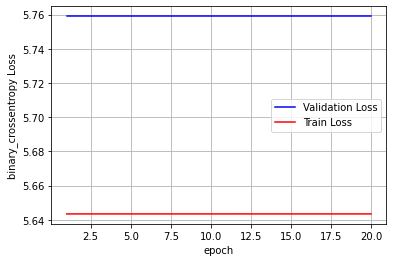

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [49]:
# make probability predictions with the model
predictions = model.predict(X)


In [53]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [51]:
# round predictions 
rounded = [round(x[0]) for x in predictions]

In [52]:
rounded

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [54]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(16, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(8, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_sigmoid.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
3/3 [==============================] - 0s 39ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 3/20
3/3 [==============================] - 0s 7ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 5/20
3/3 [==============================] - 0s 8ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 6/20
3/3 [==============================] - 0s 8ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 7/20
3/3 [==============================] - 0s 7ms/step - loss: 5.6434 - accuracy: 0.6299 - val_loss: 5.7590 - val_accuracy: 0.6223
Epoch 8/20
3/3 [=================